In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Introduction - inflation

In [2]:
path = "csv_for_story/movie_with_inflation.csv"
movie_with_inflation = pd.read_csv(path)

The original distribution of the inflated movie box office revenue exhibits a heavy-tailed pattern, with a few movies achieving extremely high revenues. By applying a logarithmic transformation on the x-axis, we "approximate" a normal distribution, making the data more amenable to statistical analyses that assume normality.

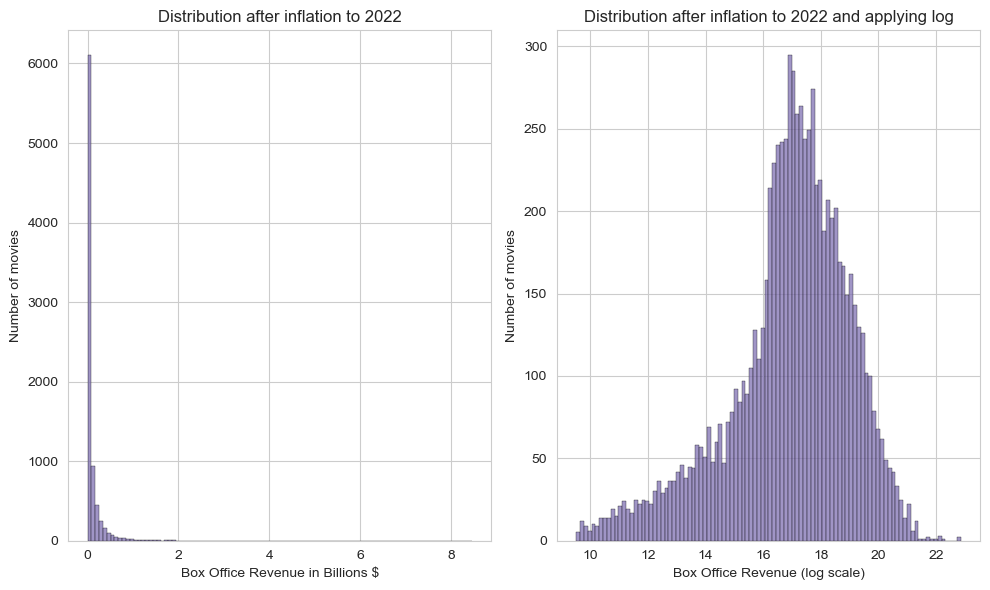

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the original distribution and the distribution after applying log function on the revenue feature
sns.histplot(data=movie_with_inflation, x=movie_with_inflation['Revenue_with_inflation']/1e9, bins=100, color=sns.color_palette("deep")[4], edgecolor='black', ax=ax1)
ax1.set(title='Distribution after inflation to 2022',
        xlabel='Box Office Revenue in Billions $',
        ylabel='Number of movies')

# Distribution after applying log
sns.histplot(data=movie_with_inflation, x='log_revenues', bins=100, edgecolor='black', color=sns.color_palette("deep")[4],ax=ax2)
ax2.set(title='Distribution after inflation to 2022 and applying log',
        xlabel='Box Office Revenue (log scale)',
        ylabel='Number of movies')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Now that we have seen that we should use logs, we can look at the effect of applying the inflation to the revenues across the years.

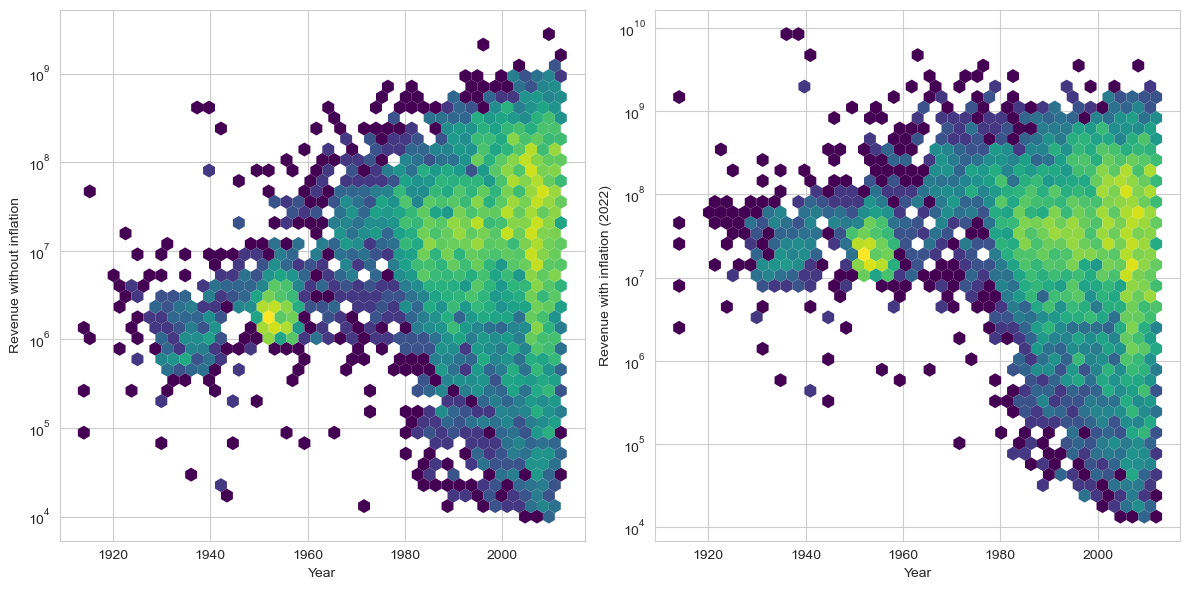

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Revenue without inflation
ax1.hexbin(movie_with_inflation['Year'], movie_with_inflation['Movie_box_office_revenue'], gridsize=40, bins='log', yscale='log', linewidths=0, cmap='viridis')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue without inflation')

# Plot for Revenue with inflation
ax2.hexbin(movie_with_inflation['Year'], movie_with_inflation['Revenue_with_inflation'], gridsize=40, bins='log', yscale='log', linewidths=0, cmap='viridis')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue with inflation (2022)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

We can see that it has effectively highered older revenues, and it is actually resulting in a more similar distribution across the years. Two points to note :
    -the highest old revenues have now surpassed the other. The inflation had huge impact on them and made them outliers.
    -even the most recent revenues have been inflated since we are considering the inflation to 2022, to make it more reprensentative for us.

# Actors

In [5]:
path = "csv_for_story/top_actors.csv"
top_actors = pd.read_csv(path)

**Important** Here as in many following feature analysis, we will be averaging log_revenues instead of revenues. This corresponds to computing the geometric mean instead of an arithmetic mean with the objective of gaining statistical stability:
The geometric mean tends to be less sensitive to extreme values (outliers) compared to the arithmetic mean. This makes it a more robust measure in situations where there are significant variations in the data , since it represent better the central tendency.
 In our case, it is  useful to penalize the big variances in revenues thus focusing on the consistency of the contribution of the analysed feature.

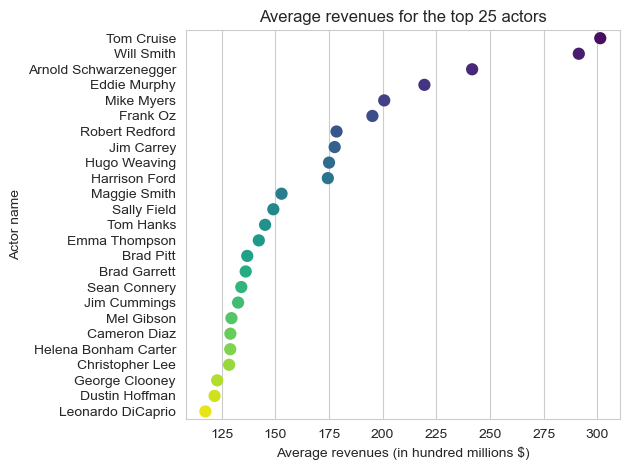

In [7]:
# Plot the geometric mean revenues for the top 25 actors
sns.pointplot(y='Actor_name', x='revenues_in_millions', data=top_actors.head(25), palette='viridis', errorbar=None)
plt.title('Average revenues for the top 25 actors')
plt.xlabel('Average revenues (in hundred millions $)')
plt.ylabel('Actor name')
plt.tight_layout()
plt.show()

With geometric mean for actors, we are favoring those with consistent success over the ones who only participated in a few hits. A clear demonstration is that selecting the top actors with arithmetic mean was resulting in many actors from harry potter or other saga. This is because there are many film in these saga with high revenues, which was boosting the actors mean revenue despite them not having only nor much successful movies.

# Release months

We first check if there is a correlation between the release month of a movie and the box office revenue, in order to see if we will consider release months in the final formula.

In [8]:
path = "csv_for_story/months_df.csv"
months_df = pd.read_csv(path)

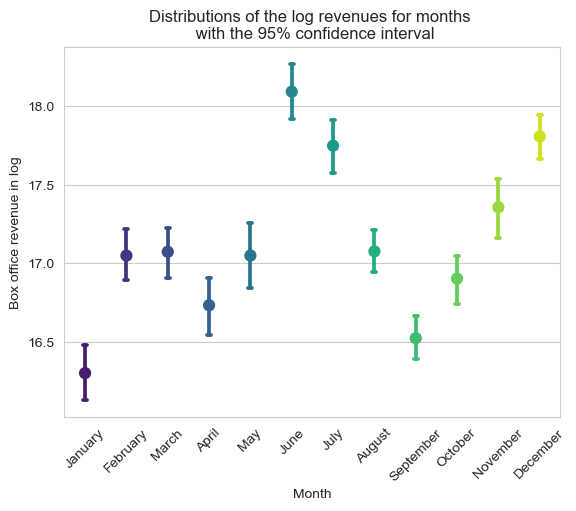

In [9]:
# boxplot of the revenues for each month
ax = sns.pointplot(x='Month', y='log_revenues', data=months_df, palette='viridis', capsize=0.1)
plt.title("Distributions of the log revenues for months \n with the 95% confidence interval")
plt.ylabel("Box office revenue in log")
plt.xlabel("Month")
# Customize x-axis labels
custom_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October","November", "December"]
ax.set_xticklabels(custom_labels, rotation=45)
plt.show()

We observe that the best month to launch a movie is June, with a significant difference (no overlapping ci). It is followed by December and July. This pattern aligns with the months when students typically have vacations, which might explain the results.

# Women percentage

We are now interested into the proportion of men and women actors in movies. We will analyze if there is a particular proportion that generally results in higher box office revenue. To this extend, we will analyze the percentage of actress in movies and how they relate to the box office revenues.

In [10]:
path = "csv_for_story/gender_df.csv"
gender_df = pd.read_csv(path)

We will now perform an equal frequency discretization of the percentage of women, to divide percentages into 8 groups where we have an equal number of movies in each group. This way, instead of feeding the final formula with an actual percentage of women, we will feed it with categorical variables.

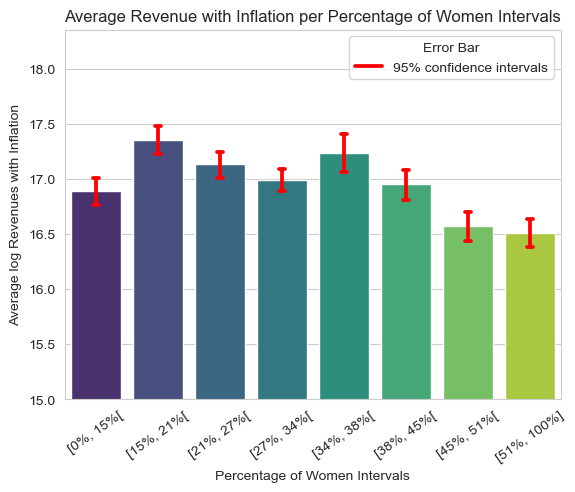

In [11]:
# Boxplot
ax = sns.barplot(x=gender_df['group'], y=gender_df['log_revenues'],palette='viridis', capsize=0.1, errcolor='red')

# Customize x-axis labels
custom_labels = ["[0%, 15%[", "[15%, 21%[", "[21%, 27%[", "[27%, 34%[", "[34%, 38%[", "[38%, 45%[","[45%, 51%[", "[51%, 100%]"]

ax.set_xticklabels(custom_labels, rotation=35)

plt.ylim(15, None)
plt.xlabel('Percentage of Women Intervals')
plt.ylabel('Average log Revenues with Inflation')
plt.title('Average Revenue with Inflation per Percentage of Women Intervals')

# Add legend
plt.legend(title='Error Bar', labels=['95% confidence intervals'])

plt.show()

From the plot, we can see that movies with women percentage between 15% and 21% result in significantly higher box office revenues, followed by movies that have women percentage of 34% to 38%. While movies with 45% to 100% have significantly lower mean box office revenues, and their confidence intervals don't intersect with other intervals.

# Movie runtime


In [14]:
path = "csv_for_story/movie_runtime.csv"
movie_runtime_df = pd.read_csv(path)

We are first discretizing the movie runtime into meaningful fixed width intervals to break linearity and allow better interpretation of the results. This will also serve in the regression analysis later on.

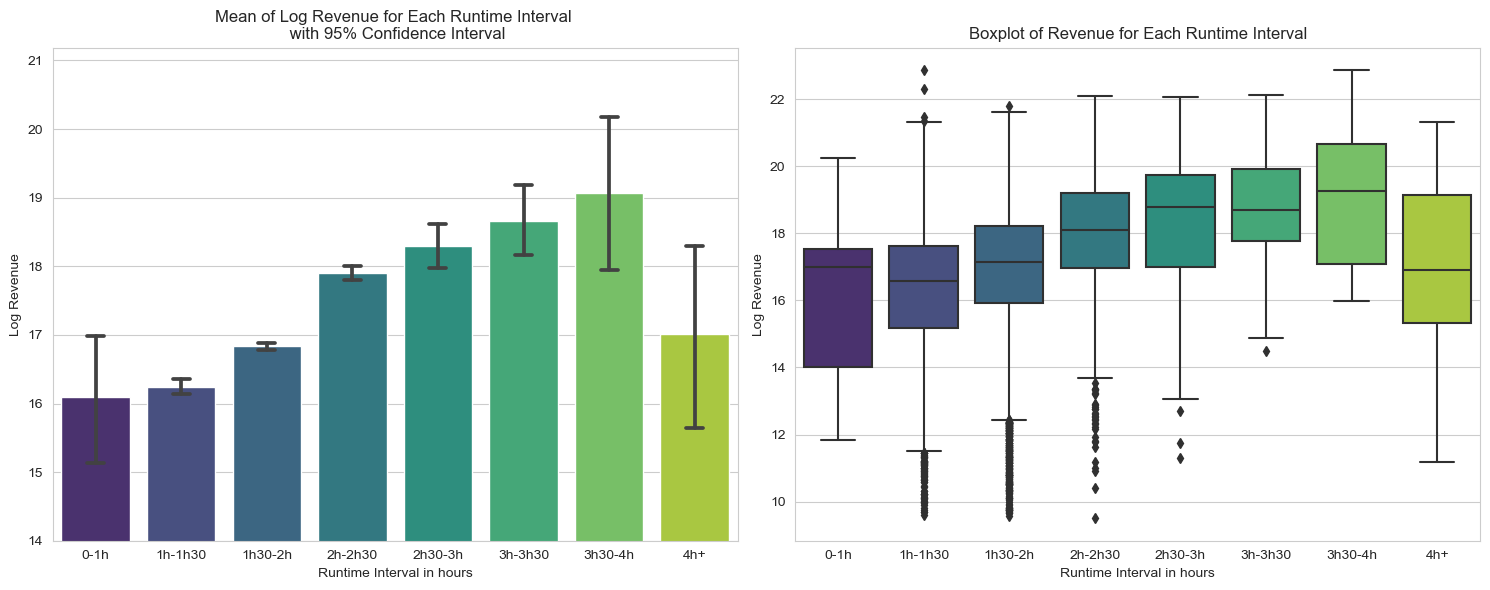

In [18]:
movie_runtime_df['Interval'] = pd.cut(movie_runtime_df['Movie_runtime'], bins=[0, 60, 90, 120, 150, 180, 210, 240, 1000], labels=['0-1h', '1h-1h30', '1h30-2h', '2h-2h30', '2h30-3h', '3h-3h30', '3h30-4h', '4h+'])
# Set up a multi-plot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean revenue with error bars and 95% confidence interval
sns.barplot(x='Interval', y='log_revenues', data=movie_runtime_df, capsize=.2, palette='viridis', ax=ax1)
ax1.set_title('Mean of Log Revenue for Each Runtime Interval \n with 95% Confidence Interval')
ax1.set_xlabel('Runtime Interval in hours')
ax1.set_ylabel('Log Revenue')
#limit axis 1 to (14, none)
ax1.set_ylim(14, None)

# Plot the boxplot
sns.boxplot(x='Interval', y='log_revenues', data=movie_runtime_df, palette='viridis', ax=ax2)
ax2.set_title('Boxplot of Revenue for Each Runtime Interval')
ax2.set_xlabel('Runtime Interval in hours')
ax2.set_ylabel('Log Revenue')

plt.tight_layout()
plt.show()

We can first see that exceeding 2h leads to a big increase in revenue compared to the lower runtimes. It looks like an important threshold to reach. It is still significantly increasing when passing from 2h-2h30 to 2h30-3h but past that point, even if it looks like the revenue continues to grow, we don't have signficant difference between the 3 folowing intervals since their ci overlap. As it seems that film lasting 3h30 to 4h earns the most, the key point is exceeding at least 2h, if possible 2h30. Finally we observe a drop for films with more than 4h as we could have expected. We can also see that the 4h+ movies have a very high variance, which can be explained since there are very few movies with such a long runtime.

On the boxplot we notice that the median (top50%) of films with runtime between 2h and 2h30 is that the same level as the first quartile (top25%) of the movies with runtime between 1h30 and 2h. Said otherwise, 50% of films between 2h and 2h30 have a higher revenue than 75% of films between 1h30 and 2h. This is a big difference of revenue for such a small difference of runtime. It will be an important feature to consider in our final formula.